In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
# Assuming the dataset is in a CSV file
df = pd.read_excel('consumer_profile_dataset.xls')


In [4]:
print(df.head())

   subject  Age  Gender      Occupation     occu_code Education   edu_code  \
0        1   46       1        Business      Business      SSLC  BelowGrad   
1        2   22       1        Business      Business      SSLC  BelowGrad   
2        3   38       1  Civil Engineer  Professional        ME   PostGrad   
3        4   37       1         Unknown        Others       B A       Grad   
4        5   53       1        Business      Business     B Com       Grad   

   own_car car_Brand  own_two_wheeler  ... r11  r12  r13  r14  r15  r16  r17  \
0        2   Unknown                1  ...   3    3    3    3    3    3    3   
1        2   Unknown                1  ...   3    3    3    3    3    3    3   
2        1    Toyota                2  ...   1    2    2    2    1    2    2   
3        2   Unknown                1  ...   3    3    3    3    2    3    3   
4        2   Unknown                1  ...   3    3    3    3    3    2    3   

   r18  r19  r20  
0    3    3    3  
1    3    3 

In [5]:
print(df.isnull().sum())

subject              0
Age                  0
Gender               0
Occupation           0
occu_code            0
Education            0
edu_code             0
own_car              0
car_Brand            0
own_two_wheeler      0
two_wheeler_Brand    0
r1                   0
r2                   0
r3                   0
r4                   0
r5                   0
r6                   0
r7                   0
r8                   0
r9                   0
r10                  0
r11                  0
r12                  0
r13                  0
r14                  0
r15                  0
r16                  0
r17                  0
r18                  0
r19                  0
r20                  0
dtype: int64


In [31]:
print(df.describe())

          subject         Age      Gender     own_car  own_two_wheeler  \
count  473.000000  473.000000  473.000000  473.000000       473.000000   
mean   244.498943   34.365751    1.141649    1.547569         1.190275   
std    141.037937    9.098534    0.349059    0.498259         0.392934   
min      1.000000   21.000000    1.000000    1.000000         1.000000   
25%    123.000000   27.000000    1.000000    1.000000         1.000000   
50%    245.000000   32.000000    1.000000    2.000000         1.000000   
75%    366.000000   40.000000    1.000000    2.000000         1.000000   
max    487.000000   64.000000    2.000000    2.000000         2.000000   

               r1          r2          r3          r4          r5  ...  \
count  473.000000  473.000000  473.000000  473.000000  473.000000  ...   
mean     3.687104    3.057082    2.959831    2.583510    2.528541  ...   
std      0.908635    1.012066    0.368910    1.040444    0.913487  ...   
min      1.000000    1.000000    1.00

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Initialize LabelEncoder
le = LabelEncoder()
# Encode categorical columns
df['Gender'] = le.fit_transform(df['Gender'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Education'] = le.fit_transform(df['Education'])
df['car_Brand'] = le.fit_transform(df['car_Brand'])
df['two_wheeler_Brand'] = le.fit_transform(df['two_wheeler_Brand'])

# Encode 'edu_code' and 'occu_code' as they seem to be categorical
df['edu_code'] = le.fit_transform(df['edu_code'])
df['occu_code'] = le.fit_transform(df['occu_code'])


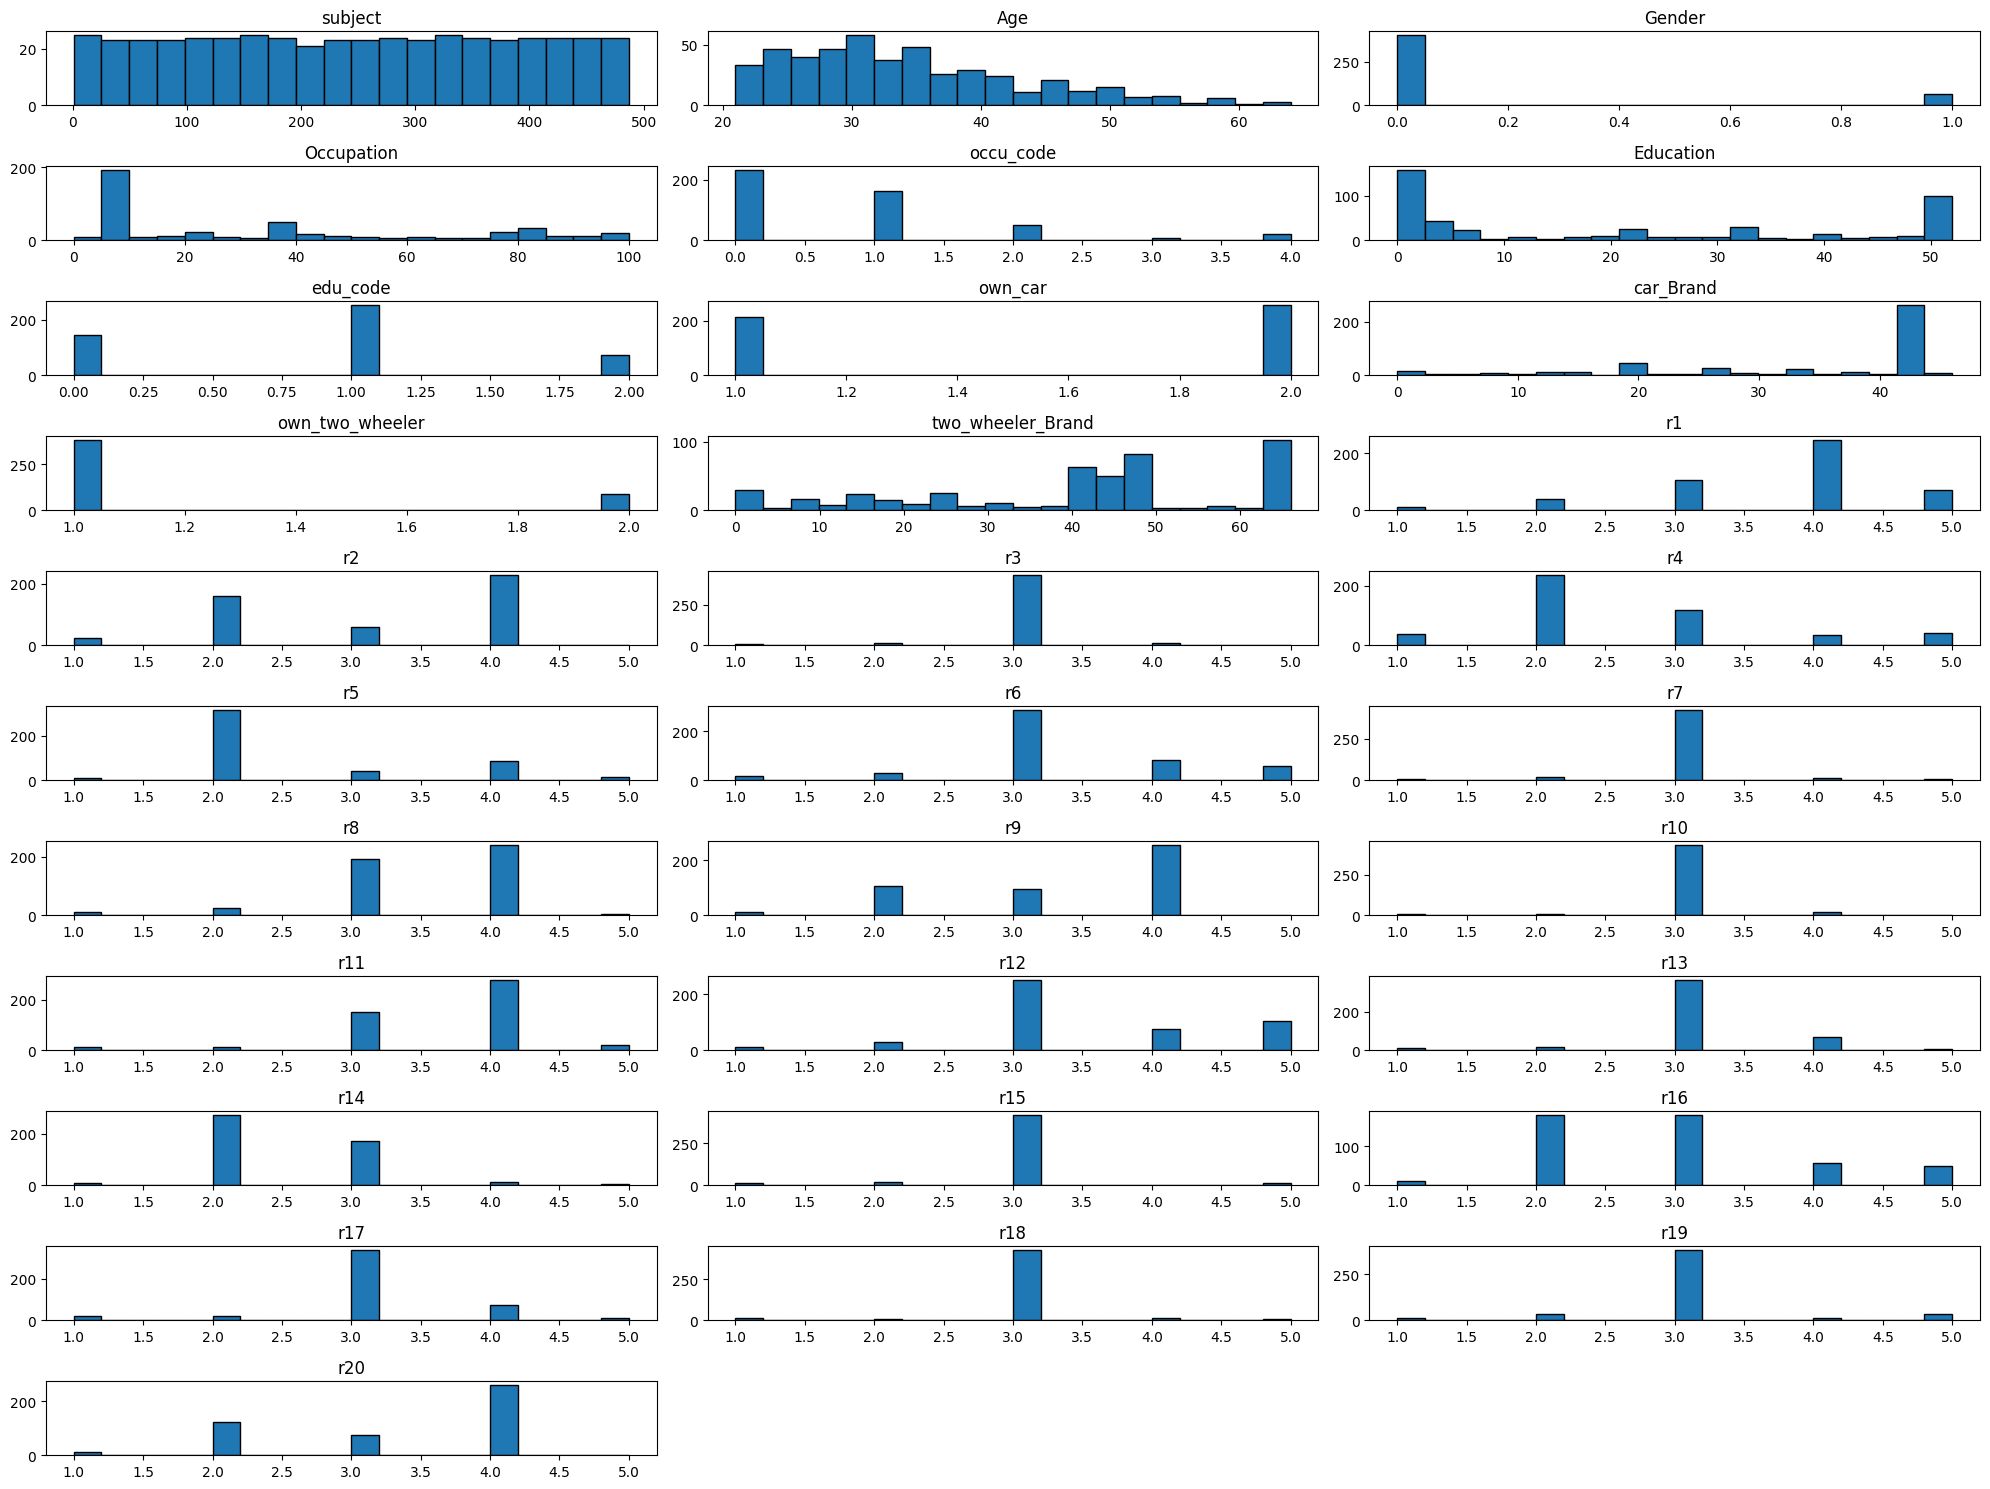

In [34]:
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(20, 15))

# Loop through all columns in the dataframe
for i, col in enumerate(df.columns):
    plt.subplot(len(df.columns) // 3 + 1, 3, i + 1)  # Create a grid layout
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(col)
    plt.tight_layout()  # Adjust subplots to fit into the figure area

# Display the plot
plt.show()


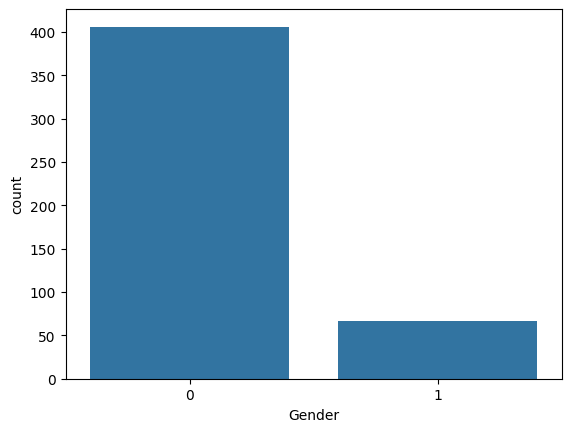

In [35]:
sns.countplot(x='Gender', data=df)
plt.show()

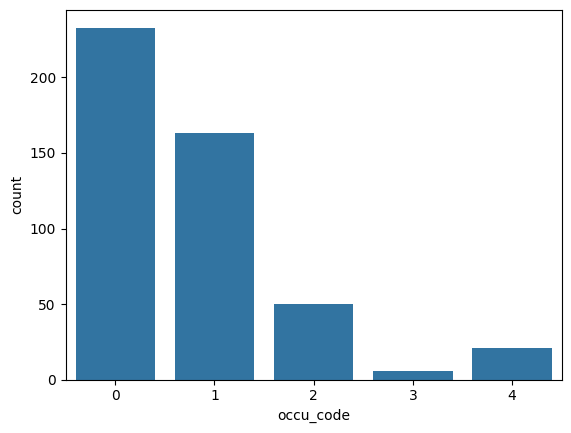

In [37]:
sns.countplot(x='occu_code', data=df)
plt.show()

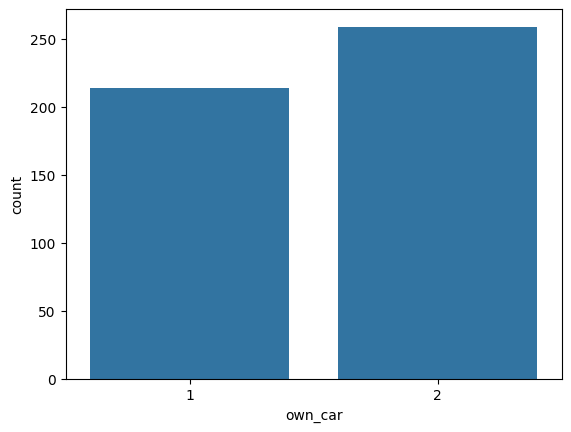

In [39]:
sns.countplot(x='own_car', data=df)
plt.show()

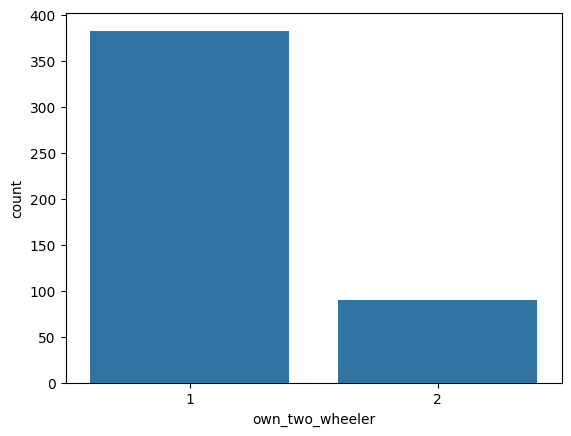

In [40]:
sns.countplot(x='own_two_wheeler', data=df)
plt.show()

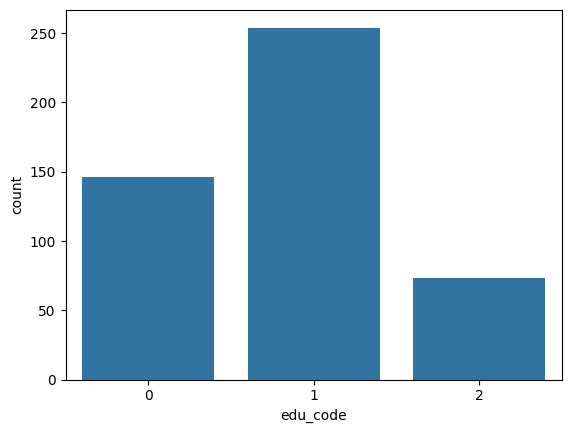

In [38]:
sns.countplot(x='edu_code', data=df)
plt.show()

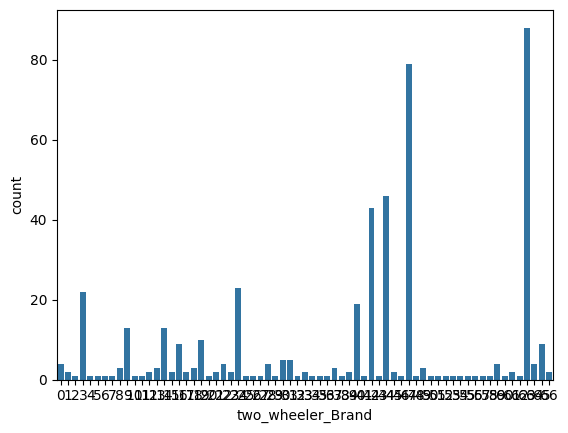

In [43]:
sns.countplot(x='two_wheeler_Brand', data=df)
plt.show()

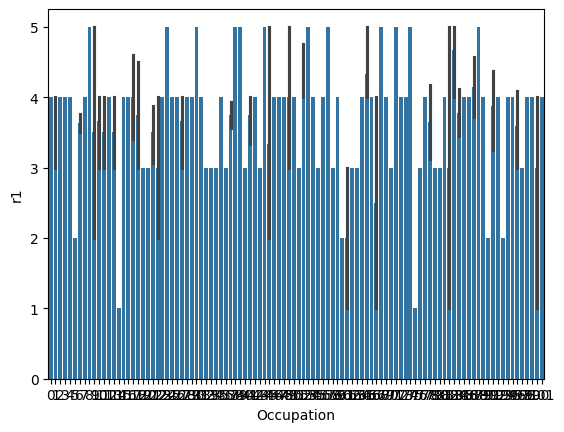

In [20]:
sns.barplot(x='Occupation', y='r1', data=df)
plt.show()

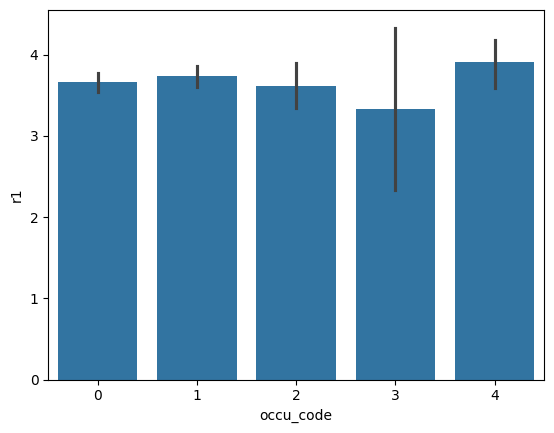

In [25]:
sns.barplot(x='occu_code', y='r1', data=df)
plt.show()

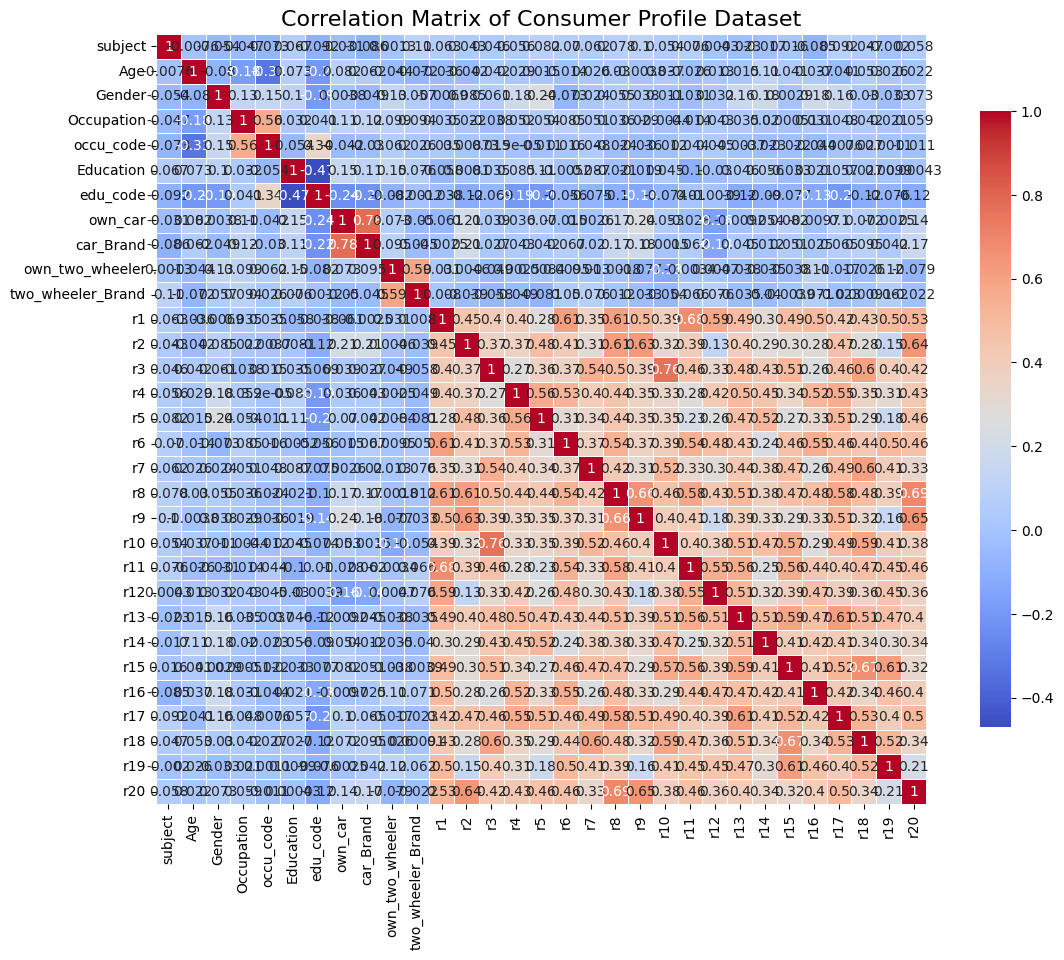

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up a larger figure size for better readability
plt.figure(figsize=(14, 10))

# Create the heatmap with enhanced readability
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    annot_kws={"size": 10},  # Adjust the annotation font size
    linewidths=0.5,  # Add gridlines for better separation
    square=True,  # Ensure each cell is square-shaped
    cbar_kws={'shrink': 0.8}  # Shrink the color bar for better fit
)

# Add a title for context
plt.title('Correlation Matrix of Consumer Profile Dataset', fontsize=16)

# Display the plot
plt.show()


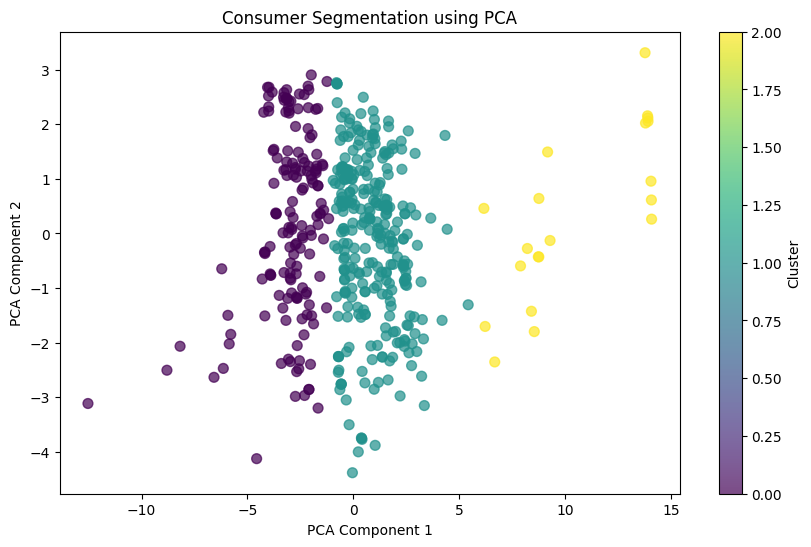

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize all features before clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[df.columns])

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Apply PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Visualize the clusters in the PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Consumer Segmentation using PCA')
plt.colorbar(label='Cluster')
plt.show()


In [52]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

          subject       Age    Gender  Occupation  occu_code  Education  \
Cluster                                                                   
0        0.066668 -0.001698  0.324437    0.140584   0.056454   0.119072   
1       -0.023780  0.023692 -0.164013   -0.064918  -0.028477  -0.086635   
2       -0.171404 -0.337307 -0.119444   -0.142791  -0.021708   0.347478   

         edu_code   own_car  car_Brand  own_two_wheeler  ...       r11  \
Cluster                                                  ...             
0       -0.247676  0.026000   0.030572         0.099421  ...  0.458261   
1        0.079949  0.033392   0.026169        -0.071621  ... -0.050004   
2        0.761019 -0.698305  -0.627282         0.279542  ... -2.857280   

              r12       r13       r14       r15       r16       r17       r18  \
Cluster                                                                         
0        0.612295  0.722990  0.708184  0.405572  0.912262  0.780474  0.368666   
1       -0

In [56]:
import pandas as pd

# Calculate the average of the standardized variables
averages = scaled_features.mean(axis=0)

# Create a DataFrame for display
averages_df = pd.DataFrame(data={'Variable': df.columns, 'Mean': averages})

# Display the averages in a table format
print(averages_df.to_string())

             Variable          Mean
0             subject -1.201764e-16
1                 Age -1.502205e-17
2              Gender -3.755511e-17
3          Occupation  1.877756e-17
4           occu_code  0.000000e+00
5           Education -1.502205e-17
6            edu_code -3.004409e-17
7             own_car  3.004409e-17
8           car_Brand -1.502205e-17
9     own_two_wheeler -1.408317e-17
10  two_wheeler_Brand  2.253307e-17
11                 r1 -1.877756e-17
12                 r2  2.253307e-17
13                 r3  4.131062e-17
14                 r4 -3.004409e-17
15                 r5  0.000000e+00
16                 r6 -2.253307e-17
17                 r7  0.000000e+00
18                 r8 -5.257716e-17
19                 r9 -3.004409e-17
20                r10 -7.511023e-18
21                r11  1.502205e-17
22                r12 -1.502205e-17
23                r13  3.755511e-18
24                r14 -3.004409e-17
25                r15  3.755511e-18
26                r16 -6.008

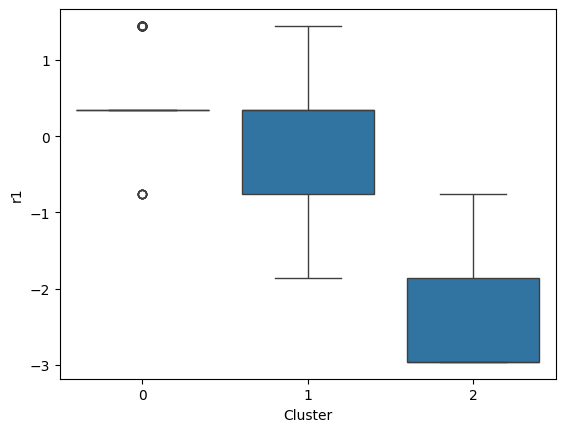

In [53]:
sns.boxplot(x='Cluster', y='r1', data=df)
plt.show()


In [57]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=3)
df['Cluster_Agg'] = clustering.fit_predict(df)

# Analyze cluster characteristics
cluster_profile = df.groupby('Cluster_Agg').mean()
print("Cluster Profiles using Agglomerative Clustering:")
print(cluster_profile)

Cluster Profiles using Agglomerative Clustering:
              subject       Age    Gender  Occupation  occu_code  Education  \
Cluster_Agg                                                                   
0            0.041871  0.055520 -0.273460   -0.063674  -0.021708  -0.075793   
1           -0.213771 -0.333639 -0.133101   -0.120117   0.037920   0.357135   
2           -0.070915 -0.085798  0.714033    0.180882   0.048728   0.133259   

             edu_code   own_car  car_Brand  own_two_wheeler  ...       r12  \
Cluster_Agg                                                  ...             
0            0.088508  0.096659   0.092874        -0.099461  ... -0.170195   
1            0.807725 -0.717439  -0.671250         0.243147  ... -1.621771   
2           -0.356553 -0.126963  -0.124960         0.211870  ...  0.696878   

                  r13       r14       r15       r16       r17       r18  \
Cluster_Agg                                                               
0           -0

In [59]:
from sklearn.ensemble import GradientBoostingRegressor  # Import the regressor

# Example: Predict the value of 'own_car'
X = df.drop('own_car', axis=1)
y = df['own_car']
clf = GradientBoostingRegressor()  # Use GradientBoostingRegressor
clf.fit(X, y)
predictions = clf.predict(X)

# Evaluate and analyze predictions (use regression metrics)
from sklearn.metrics import mean_squared_error, r2_score
print(f"Mean Squared Error: {mean_squared_error(y, predictions)}")
print(f"R-squared: {r2_score(y, predictions)}")

Mean Squared Error: 7.055079108657453e-10
R-squared: 0.9999999992944921
